In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/dataset/df_success_year.csv')
df

,year,title,artist/s,total
0,2009,2008 One Two - 못된 여자,One Two,209.9128
1,2012,All For You,"Seo In Guk, JEONG EUN JI",209.5165
2,2009,마음으로 하는 말 : Originally Performed By 프리스타일 Kara...,코케,201.5591
3,2004,Memory Loss,Gummy,201.3088
4,2008,라라라,발라드가수들,199.8724
...,...,...,...,...
792,2003,정말 사랑했을까,BROWN EYED SOUL,67.1589
793,2005,혼자만 하는 사랑,Gummy,66.7130
794,2008,가지마 가지마 (안녕? 난 건이라고해~ 독수리 건),안녕? 난 건이라고해~ 독수리 건,63.3126
795,2021,Bambi,BAEKHYUN,62.9477


In [ ]:
df = df.drop(['year', 'title'], axis=1)
df

,artist/s,total
0,One Two,209.9128
1,"Seo In Guk, JEONG EUN JI",209.5165
2,코케,201.5591
3,Gummy,201.3088
4,발라드가수들,199.8724
...,...,...
792,BROWN EYED SOUL,67.1589
793,Gummy,66.7130
794,안녕? 난 건이라고해~ 독수리 건,63.3126
795,BAEKHYUN,62.9477


In [ ]:
df.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)

artist/s         total   
TWICE            109.1920    2
                 131.3524    2
BIGBANG          127.2813    2
TWICE            134.4089    2
Jung Seung Hwan  123.2769    2
                            ..
Harim            181.9015    1
HoWL, J          167.1498    1
Holland          85.9450     1
Hong Dae Kwang   89.7350     1
플라워              75.1800     1
Length: 791, dtype: int64

In [ ]:
df.drop_duplicates(subset=['artist/s'])
df.head

<bound method NDFrame.head of                      artist/s     total
0                     One Two  209.9128
1    Seo In Guk, JEONG EUN JI  209.5165
2                          코케  201.5591
3                       Gummy  201.3088
4                      발라드가수들  199.8724
..                        ...       ...
792           BROWN EYED SOUL   67.1589
793                     Gummy   66.7130
794        안녕? 난 건이라고해~ 독수리 건   63.3126
795                  BAEKHYUN   62.9477
796            Fly to the Sky   59.6151

[797 rows x 2 columns]>

In [ ]:
#Indexing according to artist/s by the .set_index() function
df.set_index('artist/s', inplace=True)
X = df.values
X.shape

(797, 1)

In [ ]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
#Hierarchical clustering: creation of a link matrix according to Ward's method
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45212 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_

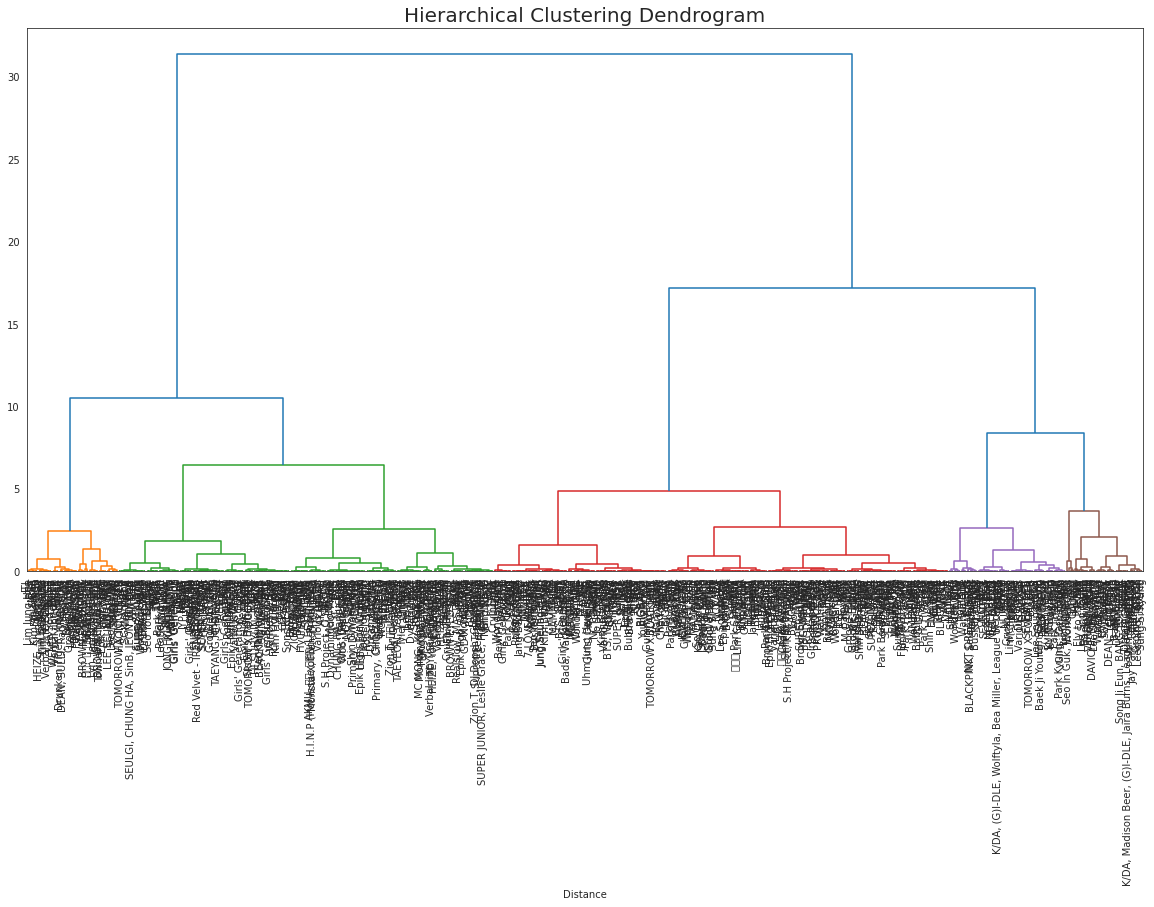

In [ ]:
#Displaying the first global dendrogram
import seaborn as sns
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = df.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.savefig("dendrogram.png")
plt.show()

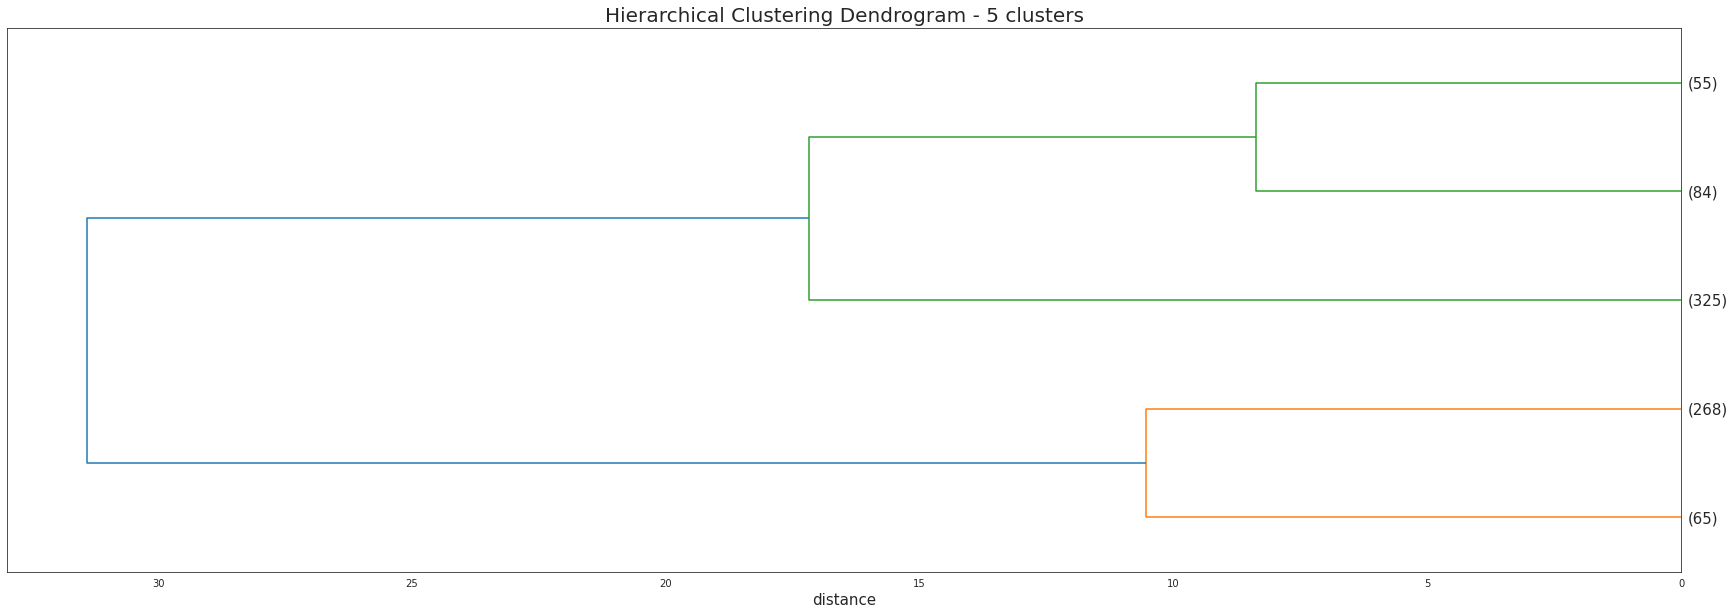

In [ ]:
#partitioning the dendrogram into five groups
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = df.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.savefig("CAH.png")
plt.show()

In [ ]:
#Identification of the 5 groups obtained
groups = fcluster(Z, 5, criterion='maxclust')
print('Number of groups : ' + str(np.unique(groups)))

#Sorted index of groups
idg = np.argsort(groups)

#Display of artist/s according to their groups
df_groups = pd.DataFrame(df.index[idg], groups[idg]).reset_index()
df_groups = df_groups.rename(columns={'index':'Group'})

Number of groups : [1 2 3 4 5]


In [ ]:
#Integration of groups in our initial sample represented by the "df" dataframe
#Inner join necessary to achieve aggregation of our data
df_groups = pd.merge(df, df_groups, on='artist/s')

In [ ]:
#sort by artist/s name
#remove duplicate artist/s
df_groups.sort_values("artist/s", inplace=True)
df_groups.drop_duplicates(subset="artist/s", keep=False, inplace=True)
df_groups.to_csv('5_groups_dendrogram.csv')
df_groups

,artist/s,total,Group
3640,015B,114.2830,2
3759,15&,98.0686,2
3760,3YE,97.4446,2
3407,4MEN,127.3393,3
3008,"4MEN, MIIII",133.7193,3
...,...,...,...
2531,이시안,144.4123,4
2748,이정현,137.7442,3
3627,정재욱,116.8422,2
3055,조규만 Cho Kyu Man,130.8930,3


In [ ]:
#Preparation of subsets to characterize the groups one by one
df_group1 = df_groups[df_groups['Group'] == 1]
df_group2 = df_groups[df_groups['Group'] == 2]
df_group3 = df_groups[df_groups['Group'] == 3]
df_group4 = df_groups[df_groups['Group'] == 4]
df_group5 = df_groups[df_groups['Group'] == 5]

In [ ]:
#First comparison of the averages in order to identify the most buoyant group of artists at this level of the analysis
df_groups.groupby('Group').mean()

,total
Group,
1,79.468338
2,104.161236
3,131.424153
4,151.362100
5,178.795644


In [ ]:
##############
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
#artist/s of group 5 identified as potentially interesting in terms of success
#display of the names of the artist/s that each group composes
print(df_group1['artist/s'].unique())
print(df_group2['artist/s'].unique())
print(df_group3['artist/s'].unique())
print(df_group4['artist/s'].unique())
print(df_group5['artist/s'].unique())

['DEAN, SULLI, Rad Museum' 'Drunken Tiger, Yoon Mirae' 'Epik High, Taru'
 'Eve' 'HEIZE, Shin Yong Jae' 'Holland' 'Hwanhee' 'JYJ' 'Kim Ah Joong'
 'Lee Hyun Woo' 'Leessang, ALI' 'Lyn, Jeon Hayeoung' 'Punch'
 'Seo Moon Tak' 'The Jadu' 'Towner & Town Chief' 'Verbal Jint, AILEE'
 'Verbal Jint, Sanchez' 'WENDY, Eric Nam' '안녕? 난 건이라고해~ 독수리 건' '플라워']
['015B' '15&' '3YE' '4Minute' 'AKMU, IU' 'AKMU, 로빈, 이찬혁, LEE SUHYUN'
 'B.A.P' 'BLACKPINK, Cardi B' 'Beast' 'BoA, Gaeko' 'Brown Eyes'
 'CHUNG HA, Nucksal' 'Crush, TAEYEON' 'Crush, ZICO' 'December'
 'Dynamicduo, Muzie' 'Epik High, IU' 'Epik High, Joe Won Sun'
 'Epik High, LeeHi' 'Epik High, OHHYUK' 'Epik High, Younha' 'GD X TAEYANG'
 'Geeks' 'Girl Friends, 빅톤' "Girls' Generation-Oh!GG"
 "Girls' Generation-TTS" 'H.I.N.P (Hot Issue of Ntl. Producers)'
 'HAON, VINXEN' 'HEIZE' 'HEIZE, Gaeko' 'HEIZE, Yong Jun Hyung'
 'HEIZE, nafla' 'HI SUHYUN, BOBBY' 'Hong Dae Kwang' 'Hot Potato' 'HyunA'
 'HyunA&DAWN' 'I.O.I' 'JENNIE' 'JEON SOMI' 'JK Kim Dong Uk' 'JONGHY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

AttributeError: ignored

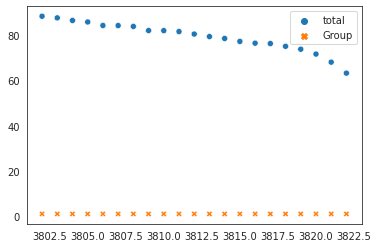

In [ ]:
from sklearn.cluster import KMeans
sns.scatterplot(data=df_group1)
plt.scatter(KMeans.cluster_centers_[:,0], KMeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

https://www.reneshbedre.com/blog/kmeans-clustering-python.html

In [ ]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k)
plt.legend()
plt.show()

In [ ]:
#extra

In [ ]:
df_success_simple = pd.read_csv('/content/drive/MyDrive/ML/dataset/df_success_simple.csv')
df_success_simple

,year,artist/s,danceability,energy,speechiness,valence,tempo
0,1990,Seo Taiji and Boys,0.698,0.738,0.0546,0.681,109.705
1,1990,N.EX.T,0.650,0.597,0.0457,0.910,124.834
2,1990,015B,0.697,0.691,0.0390,0.579,112.277
3,1990,Byun Jin-Sub,0.455,0.924,0.0660,0.359,128.210
4,1990,Kim Hyun Chul,0.699,0.668,0.0340,0.856,109.937
...,...,...,...,...,...,...,...
792,2021,SUNMI,0.515,0.858,0.1900,0.428,125.070
793,2021,NCT 127,0.561,0.758,0.0478,0.178,149.944
794,2021,"AKMU, IU",0.816,0.636,0.1010,0.499,100.923
795,2021,HyunA&DAWN,0.855,0.870,0.0826,0.863,103.028


In [ ]:
df_success_simple = df_success_simple.drop(['year'], axis=1)

In [ ]:
df_success_simple.set_index('artist/s', inplace=True)
X = df_success_simple.values
X.shape

(797, 5)

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45212 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_

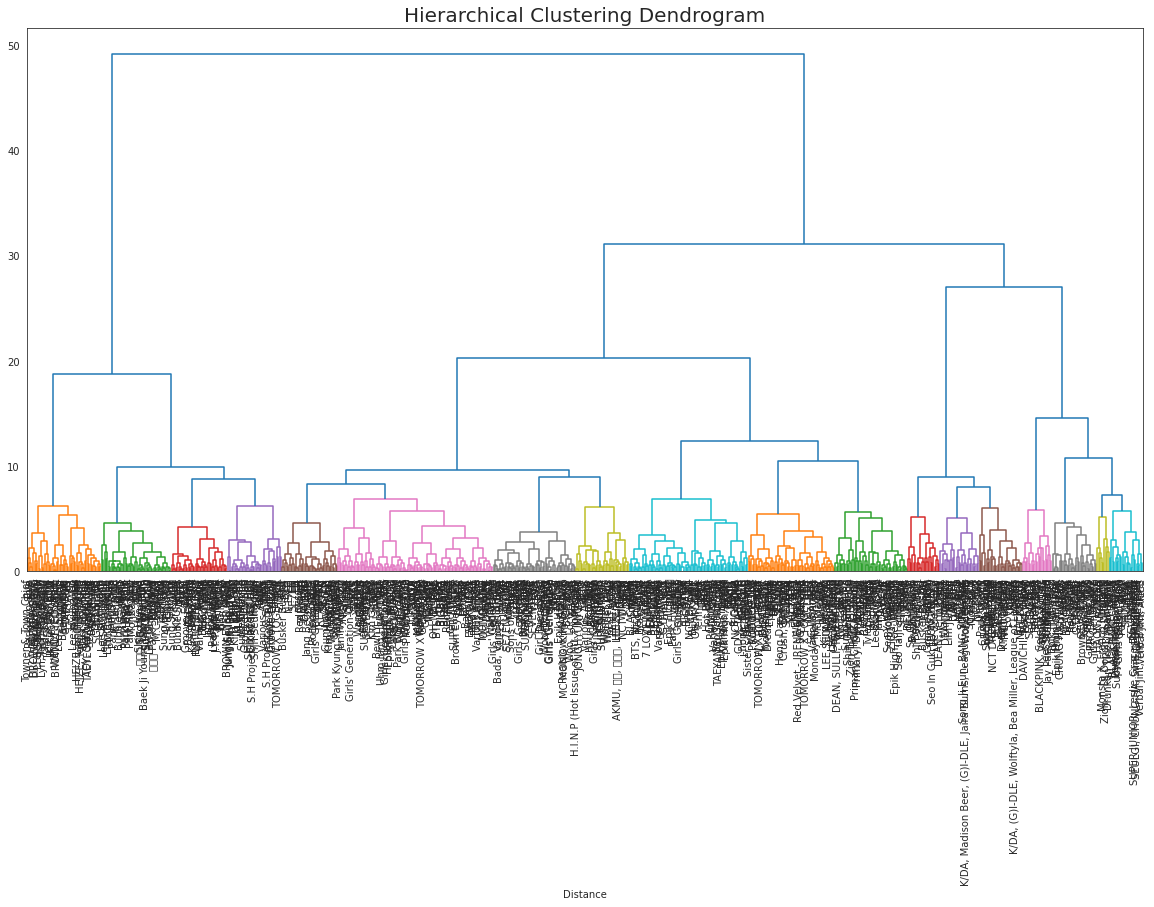

In [ ]:
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = df_success_simple.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.savefig("hierarchical_clustering_dendrogramme_global.png")
plt.show()